In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import sklearn.model_selection
from HW1.logit import Logit

In [2]:
def read_dataset(path):
    data = pd.read_csv(path)
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].apply(lambda c: 1 if c == 'P' else -1).values
    return X, y

In [3]:
def calc_f_score(X, y, alpha, solver, debug_iters):
    n_splits = 5
    cv = sklearn.model_selection.KFold(n_splits=n_splits, shuffle=True)
    mean_f_score = 0.0
    for train_indexes, test_indexes in cv.split(X):
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        y_train = y[train_indexes]
        y_test = y[test_indexes]

        classifier = Logit(alpha, solver)
        classifier.fit(X_train, y_train, debug_iters)
        y_pred = classifier.predict(X_test)

        tp = np.sum((y_pred == 1) & (y_test == 1))
        fp = np.sum((y_pred == 1) & (y_test != 1))
        tn = np.sum((y_pred != 1) & (y_test != 1))
        fn = np.sum((y_pred != 1) & (y_test == 1))

        if tp != 0:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f_score = 2 * precision * recall / (precision + recall)
            mean_f_score += f_score
    return mean_f_score / n_splits

In [4]:
def get_best_param(X, y, solver, debug_iters):
    best_alpha = None
    max_f_score = -1
    for alpha in [0.0001, 0.001, 0.01, 0.1, 1.]:
        cur_f_score = calc_f_score(X, y, alpha, solver, debug_iters)
        print('alpha =', alpha, 'f-score =', cur_f_score)
        if cur_f_score > max_f_score:
            max_f_score = cur_f_score
            best_alpha = alpha
    return best_alpha, max_f_score

In [5]:
def draw(clf, X, ans, step_x, step_y):
    x_min, y_min = np.amin(X, axis = 0)
    x_max, y_max = np.amax(X, axis = 0)
    x_min -= step_x
    x_max += step_x
    y_min -= step_y
    y_max += step_y
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_x), np.arange(y_min, y_max, step_y))
    
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(12, 12))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    x0, y0 = X[ans != 1].T
    x1, y1 = X[ans == 1].T

    plt.pcolormesh(xx, yy, zz, cmap=matplotlib.colors.ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(x0, y0, color='red', s=100)
    plt.scatter(x1, y1, color='blue', s=100)
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()

In [6]:
def process_with_solver(X, y, solver, step_x, step_y, debug_iters=None):
    best_alpha, max_f_score = get_best_param(X, y, solver, debug_iters)
    print('Best params:', best_alpha, max_f_score)
    best_classifier = Logit(best_alpha, solver)
    best_classifier.fit(X, y, debug_iters=debug_iters)
    draw(best_classifier, X, y, step_x, step_y)

In [7]:
X, y = read_dataset('data/geyser.csv')

iteration = 1000 grad = [ 0.00804429  0.00229062 -0.000803  ] ||grad|| = 0.008402521199894375
iteration = 2000 grad = [ 6.02369811e-04  1.72024788e-04 -5.59046042e-05] ||grad|| = 0.0006289413659266692
iteration = 1000 grad = [ 0.00350329  0.00095386 -0.00028518] ||grad|| = 0.0036420060582905687
iteration = 1000 grad = [-3.36269162e-04 -7.31358268e-05 -5.67117445e-05] ||grad|| = 0.0003487721607565554
iteration = 1000 grad = [ 1.42608197e-04  3.78388660e-05 -4.84074776e-06] ||grad|| = 0.0001476221880376533
alpha = 0.0001 f-score = 0.86316426868151
iteration = 1000 grad = [-0.03119808 -0.00033405 -0.02797867] ||grad|| = 0.041907485756846254
iteration = 2000 grad = [-0.01540072 -0.000217   -0.01384227] ||grad|| = 0.02070839539183457
iteration = 3000 grad = [-0.00813112 -0.0001363  -0.00731547] ||grad|| = 0.010938450641202106
iteration = 4000 grad = [-4.46814393e-03 -8.16282951e-05 -4.02446890e-03] ||grad|| = 0.006013927440405616
iteration = 5000 grad = [-2.51264489e-03 -4.77544305e-05 -2.2

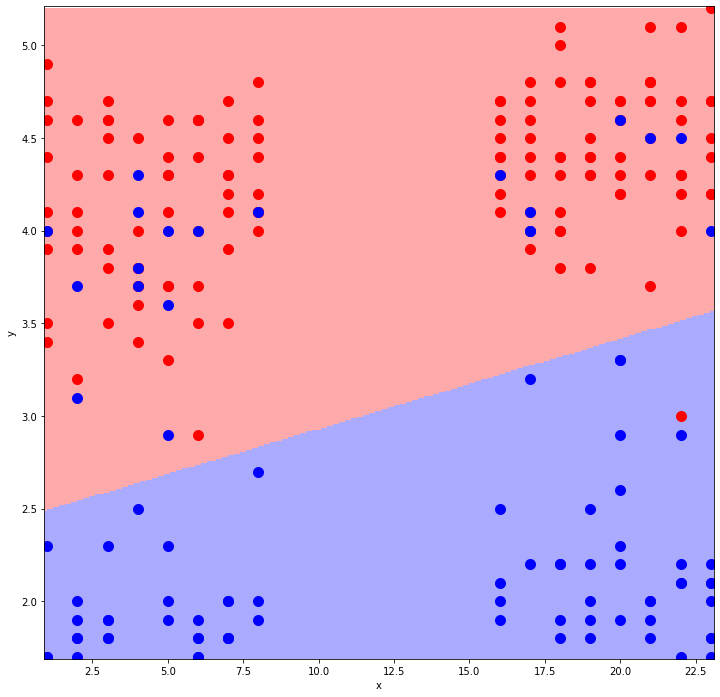

In [8]:
process_with_solver(X, y, 'gradient', 0.1, 0.01, debug_iters=1000)

alpha = 0.0001 f-score = 0.857558588459967
alpha = 0.001 f-score = 0.875262725779967
alpha = 0.01 f-score = 0.8691161851506679


/Users/kokorin-ilya/IFMO/optimization_methods/HW1/logit.py:56: RuntimeWarning: overflow encountered in double_scalars
  hess[j, k] += (cur_object[j] * cur_object[k] * cur_exp) / ((cur_exp + 1) ** 2)


alpha = 0.1 f-score = 0.5852833441068734
alpha = 1.0 f-score = 0.3552856500224921
Best params: 0.001 0.875262725779967


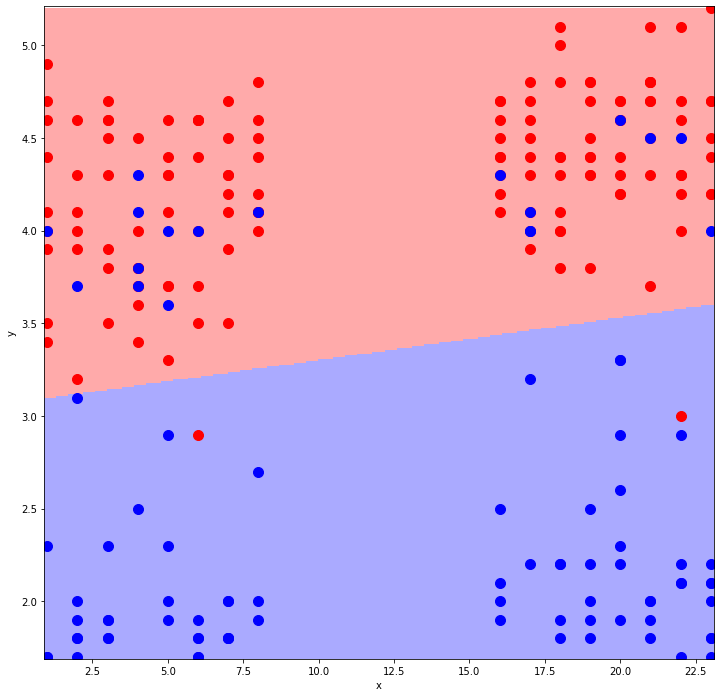

In [9]:
process_with_solver(X, y, 'newton', 0.1, 0.01)